In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#функция для отрисвки тепловой карты
#нужно указать центр окружности = (x,y) и радиус окружности = R
def plot_circle1(x,y,r):
    angles = np.linspace(0,2*np.pi,100)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.fill_between(x_cir, y_cir)

In [3]:
#функция для отрисвки окрудности (т.е траектории движении дрона)
#нужно указать центр окружности = (x,y) и радиус окружности = R
def plot_circle(x,y,r):
    angles = np.linspace(0,2*np.pi,100)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.plot(x_cir,y_cir,color = '#EEE8AA')

In [4]:
#функция для отрисвки области покрытия дрона
#нужно указать центр окружности = (x,y) и радиус окружности = R
def plot_drone_round(x,y,r):
    angles = np.linspace(0,2*np.pi,100)
    x_cir = x + r*np.cos(angles)
    y_cir = y + r*np.sin(angles)
    plt.plot(x_cir,y_cir,color = 'green')

In [5]:
# функция для создания массивов X,Y положения дрона в i-ый момент времни
def traektory(x,y,r,iterations):
    angles = np.linspace(0,2*np.pi,iterations)
    X=[]
    Y=[]
    for i in range(len(angles)):
        x_cir=x+r*np.cos(angles[i])
        y_cir=y+r*np.sin(angles[i])
        X.append(x_cir)
        Y.append(y_cir)
    return X,Y

In [6]:
# функция для расчета растояния между дроном и пользователем
def distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2+(y2-y1)**2)

In [7]:
N = 100 # число пользователей
a = 0 # левая граница рассматриваемой области в км
b = 1 # правая граница рассматриваемой области в км

In [8]:
# Задаем координаты N пользователей (равномерное распределение [a,b])
x_user=np.random.uniform(a,b,N)
y_user=np.random.uniform(a,b,N)

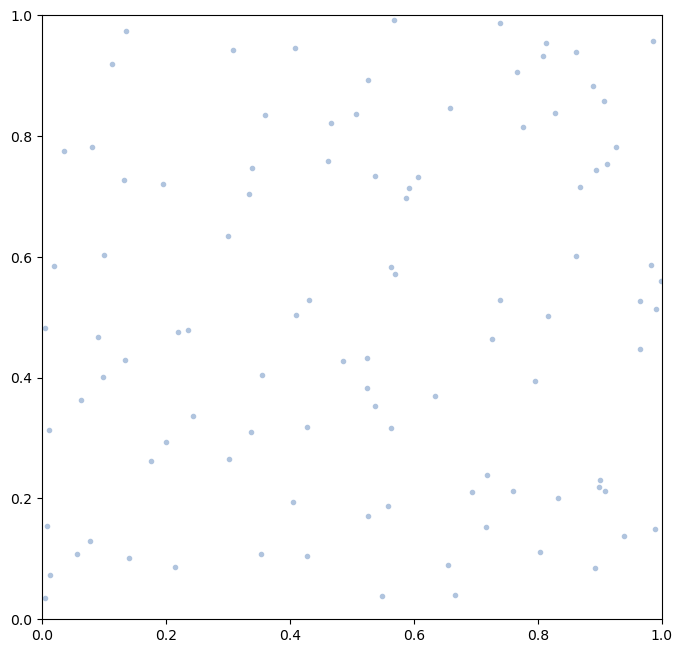

In [9]:
# Отрисовываем расположение пользователей на области
plt.figure(dpi=100,figsize=(8,8))
plt.plot(x_user,y_user,'.',color='LightSteelBlue')
plt.xlim(a,b)
plt.ylim(a,b)
plt.show()

In [10]:
R = 0.1  # радиус покрытия дрона в км 0.2755104213993242
R_traektory = (b+a)/2 - R # радиус траектории движении дрона, при которой достигается оптимальная траетория движения
X_traektory = (b+a)/2 # координата x центра для траетории
Y_traektory = (b+a)/2 # координата y центра для траетории

In [11]:
traektory_len = 2*np.pi*R_traektory # длина траетории в км
drone_speed = 5*10**-3 # скорость дрона в метрах
iterations = round(traektory_len/drone_speed) # колличество итераций 

In [12]:
# заполняем массивы X,Y положения дрона в i-ый момент времни 
X,Y=traektory(X_traektory,Y_traektory,R_traektory,iterations)
print(X[0],Y[0])

0.9 0.5


In [13]:
# блок для вычисления и заполнения массива покрытых пользователей в момент времени i
covered_users=[] # задаем список, который будет хранить количство покрытых пользователей в момент времни i
sir_users=np.array([0]*N) # задаем список, который будет вычислять SIR i - ого пользователя
for j in range (len(X)):
    covered = 0
    for i in range (len(x_user)):
        if distance(x_user[i],y_user[i],X[j],Y[j])<=R: # проверяем условие обслуживания
            covered += 1
            sir_users[i] += 1
    covered_users.append(covered)

Text(0.5, 1.0, 'Круговая траетория')

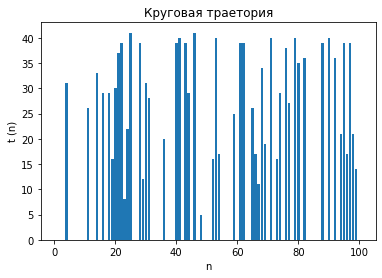

In [14]:
plt.bar([i for i in range(1,101)],sir_users)
plt.xlabel('n')
plt.ylabel('t (n)')
plt.title('Круговая траетория')

Text(0.5, 1.0, 'Круговая траетория')

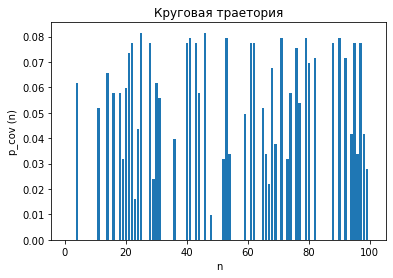

In [15]:
plt.bar([i for i in range(1,101)],sir_users/iterations)
plt.xlabel('n')
plt.ylabel('p_cov (n)')
plt.title('Круговая траетория')

mean = 2.930417495029821


Text(0.5, 1.0, 'Круговая траетория')

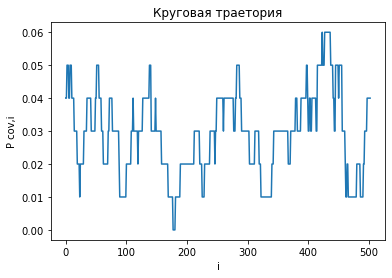

In [16]:
covered_users_copy = np.copy(covered_users)
covered_users_copy = [i/N for i in covered_users_copy]
plt.plot(range(len(X)),covered_users_copy) # график числа покрытых пользователей
mean = np.mean(covered_users) # математическео ожидание покрытых пользователей
print(f'mean = {mean}')
plt.xlabel('i')
plt.ylabel('P cov,i')
plt.title('Круговая траетория')

In [17]:
sir_users/iterations

array([0.        , 0.        , 0.        , 0.06163022, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05168986, 0.        , 0.        , 0.06560636, 0.        ,
       0.05765408, 0.        , 0.05765408, 0.03180915, 0.05964215,
       0.07355865, 0.07753479, 0.01590457, 0.04373757, 0.08151093,
       0.        , 0.        , 0.07753479, 0.02385686, 0.06163022,
       0.055666  , 0.        , 0.        , 0.        , 0.        ,
       0.03976143, 0.        , 0.        , 0.        , 0.07753479,
       0.07952286, 0.        , 0.07753479, 0.05765408, 0.        ,
       0.08151093, 0.        , 0.00994036, 0.        , 0.        ,
       0.        , 0.03180915, 0.07952286, 0.03379722, 0.        ,
       0.        , 0.        , 0.        , 0.04970179, 0.        ,
       0.07753479, 0.07753479, 0.        , 0.        , 0.05168986,
       0.03379722, 0.02186879, 0.06759443, 0.03777336, 0.        ,
       0.07952286, 0.        , 0.03180915, 0.05765408, 0.     

In [18]:
moment = int(input(f'Выбирете момент времени от 0 до {len(X)-1} : '))

Выбирете момент времени от 0 до 502 : 304


Text(0.5, 1.0, 'Time: 304')

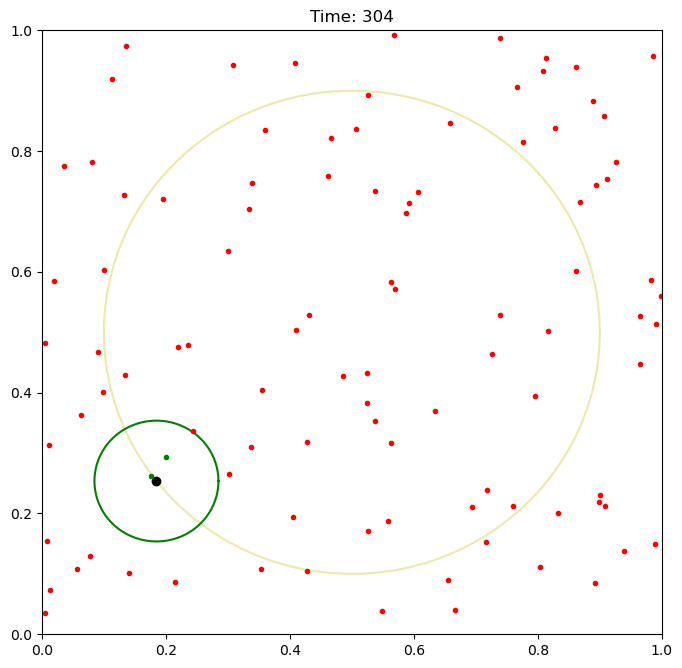

In [22]:
plt.figure(dpi=100,figsize=(8,8))
plt.xlim(a,b) #прописать границы области моделирования в ручную
plt.ylim(a,b) #прописать границы области моделирования в ручную
plot_circle(X_traektory,Y_traektory,R_traektory)
#рисуем точку доступа - дрон 
plt.plot(X[moment],Y[moment],'o',color='black')
#рисуем область покрытия дрона
plot_drone_round(X[moment],Y[moment],R)
for i in range (len(x_user)):
    if distance(x_user[i],y_user[i],X[moment],Y[moment])<=R:
        plt.plot(x_user[i],y_user[i],'.',color='green') 
    else:
        plt.plot(x_user[i],y_user[i],'.',color='red')

plt.title('Time: '+str(moment) )

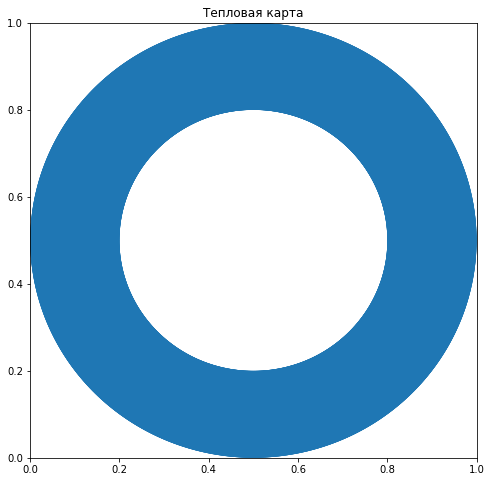

In [21]:
figure, axes = plt.subplots(figsize=(8,8))
plt.xlim(a,b) #прописать границы области моделирования в ручную
plt.ylim(a,b) #прописать границы области моделирования в ручную
for j in range (len(X)):
    Drawing_colored_circle = plt.Circle(( X[j] ,Y[j] ), R )
    axes.add_artist( Drawing_colored_circle )
plt.title( 'Тепловая карта' )

plt.show()

In [ ]:
#!!!!!!!!!!
# процесс создания гиф изображения
# не выполнять без необходимости, т.к.ваш ПК будет думать минут 10 - 20 
screen=[]
covered_users=[]
for j in range (len(X)):
    a=plt.figure(dpi=100,figsize=(8,8))    
    plt.xlim(a,b)
    plt.ylim(a,b) 
    plot_circle(X_traektory,Y_traektory,R_traektory)
    #рисуем точку доступа - дрон 
    plt.plot(X[j],Y[j],'o',color='black')
    #рисуем область покрытия дрона
    plot_drone_round(X[j],Y[j],R)
    covered = 0
    for i in range (len(x_user)):
        if distance(x_user[i],y_user[i],X[j],Y[j])<=R:
            plt.plot(x_user[i],y_user[i],'.',color='green') 
            covered +=1
        else:
            plt.plot(x_user[i],y_user[i],'.',color='red')
    covered_users.append(covered)

    plt.title('Time: '+str(j) )
    screen.append(a)
    plt.close()
    print(j)
    
import os
import imageio

screen_name=[]
for i in range (len(screen)):
    screen[i].savefig(str(i)+'saved_figure.png') 
    screen_name.append(str(i)+'saved_figure.png')
    print(i)
    
with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in screen_name:
        image = imageio.imread(filename)
        writer.append_data(image)
        print(filename)